Verificando informações referentes aos dados de nascimentos dos animais por linhagem

1) Pergunta: Qual o Número total de animais ?

In [18]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns
# import numpy as np
from statsmodels.tsa.arima_model import ARIMA
#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 18 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 18 #tamanho da fonte


In [3]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [4]:
l = 'a d f t g y h j i'.split(' ')
list(map(lambda x: str(x) + '2', l))

['a2', 'd2', 'f2', 't2', 'g2', 'y2', 'h2', 'j2', 'i2']

In [5]:
# nume_ani_nacs_acas = pd.DataFrame()
# nume_ani_nacs_acas = nume_ani[['date_acas', 'date_nasc_acas', 'num_nasc']]
# nume_ani_nacs_acas['day_nasc_acas'] = list(map(lambda day_nasc_acas: nume_ani['date_nasc_acas'] - nume_ani['date_acas'], nume_ani))[0]


In [6]:
# nume_ani_nacs_acas.info()

In [7]:
# nume_ani_nacs_acas.head()

1) Qual o número total de animais já nascidos no Biotério Fiocruz PR?
R. Para responder foi filtrada apenas a coluna 'num_ani' e somado o número de animais.

In [8]:
#numero total de animais por nascimento
nume_ani['num_ani'].sum()

15106

In [9]:
#numero total de eventos de nascimento
len(nume_ani)

1808

In [10]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)

In [11]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
Swiss-2 B     24
DBA/1J        24
Swiss-2 D     21
Swiss-2 E     21
Swiss-2 A     21
AG129          9
Name: ling, dtype: int64

In [12]:
#Agrupando por linhagem
l = nume_ani.groupby('ling')
l.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,905,99234,99234,99234,99234,99234,99234,155,228,905,81345,72034,99234,99234
AG129,43,5994,5994,5994,5994,5994,5994,9,9,43,5332,4003,5994,5994
Balb/c,4289,331668,331668,331668,331668,331668,331668,498,802,4289,256073,236898,331668,331668
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,4001,306360,306360,306360,306360,306360,306360,462,779,4001,258681,231501,306360,306360
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1612,166500,166500,166500,166500,166500,166500,252,422,1612,134025,136660,166500,166500
Swiss-1 A,515,31968,31968,31968,31968,31968,31968,48,62,515,27992,28657,31968,31968
Swiss-1 B,381,23976,23976,23976,23976,23976,23976,36,49,381,20001,20000,23976,23976


+++++++++++++ Calculo de media e mediana para printar no gráfico as faixas verde e vermelha +++++++++

In [13]:
#Calculo pra plotar mediana

mediana = nume_ani.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana = round(mediana['num_ani'].sum().median(),2)    #Somando o numero total de animas e pedidndo a mediana
mediana

381.0

In [14]:
#Calculo pra plotar média

media_g = nume_ani.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media = round(media_g['num_ani'].sum().mean(),2)        #Somando o numero total de animais e calculando a média
media                                                   #função .round() serve para arredondar

888.59

In [15]:
#Gráfico com o total de animais

# plt.figure(figsize=(15,10)) #tamanho do gráfico
# plt.title('Soma total de nascimentos de camundongos por linhagem') #título do gráfico

# plot = nume_ani.groupby('ling') #pedindo pra agrupar por linhagem
# plot['num_ani'].sum().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
# kind='barh'
# )
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #plotando as faixas de média e mediana

# plt.plot( #função para plotar o gráfico
#     [media, media], #faixa que marca a média
#     [len(nume_ani.index), 0], 
#     c='red' #cor vermelha da faixa
# )
# plt.plot( #função para plotar o gráfico
#     [mediana,mediana], #faixa que marca a mediana
#     [len(nume_ani.index), 0], 
#     c='green' #cor verde da faixa
# )

# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #configurações do gráfico

# plt.legend([str(media) + ' média ani/ling', str(mediana) + ' mediana ani/ling'])
# plt.xlabel('Número de Animais') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y
# #plt.annotate()

# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando o gráfico

# plt.savefig(
#     fname="../../resultados/numero_total_animais.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )


In [16]:
# plt.figure(figsize=(15,10))
# plt.title('Soma total de animais por Evento de Nascimento')

# test = nume_ani['num_ani'].plot(
# kind = 'hist',
# color='green',
#     bins = 10
# )

# plt.xlabel('Número de Animais') #definindo nome do eixo X
# plt.ylabel('Eventos de nascimento') #definindo nome do eixo Y

3) A distribuição dos dados é normal? 
R. Ao plotar o gráfico de animais, percebe-se que a média e mediana estão muito distantes, sugerindo discrepâncias dos valores, para verificar esse problema, foi plotado um histograma com uma curva entre os dados, podendo identificar os outliers

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


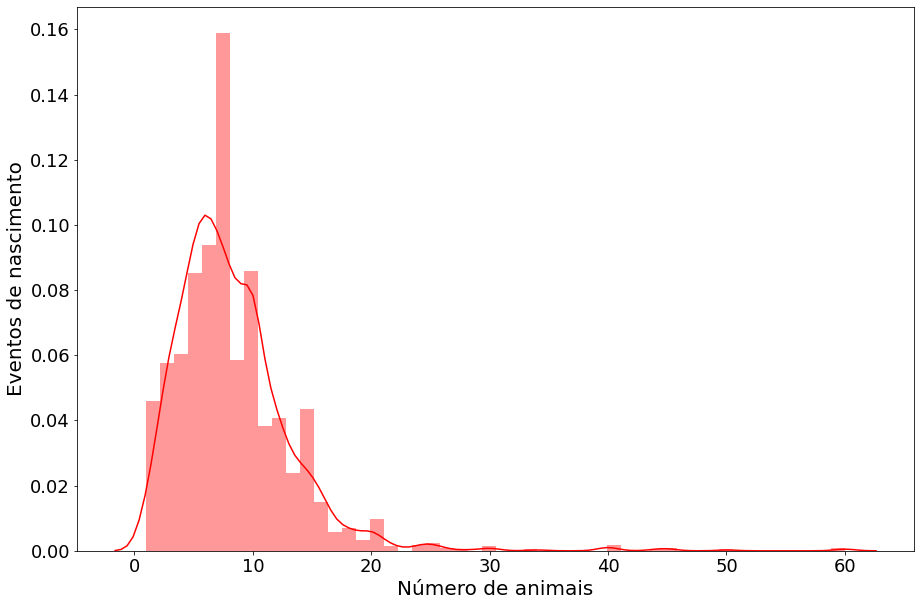

In [19]:
plt.figure(figsize=(15,10))                         #tamanho do gráfico


plot_his = sns.distplot(nume_ani['num_ani'],        #distplot - função usada para plotar curva em um gráfico do tipo histograma - seleciono minha série da Dataframe
                        hist = True,                #printando o histograma
                        kde = True,                 #deixando a curva presente
                        color='red',                #cor,
                        label = 'N° de animais')      #legenda das barras (que sei la pq não funciona)

# Plot formatting
# plt.title('Distribuição dos dados de nascimento - Histograma')
plt.xlabel('Número de animais')
plt.ylabel('Eventos de nascimento')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando o gráfico

plt.savefig(
    fname="../../resultados/numero_total_animais_histo_DISSERTACAO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

++++++++++++++++++++ Calculando media e mediana a partir das medianas dos dados. +++++++++++++++++++

In [20]:
media_plot = nume_ani.groupby('ling')                       #agrupando por linhagem e guardando na variável
calcu_mediana = round(media_plot['num_ani'].median(), 2)  #calculando a mediana de cada linhagem para plotar traço no gráfico
media_grafico = round(calcu_mediana.mean(), 2)                #Calculando a media das minhas medianas
media_grafico

8.82

In [21]:
mediana_plot = nume_ani.groupby('ling')                 #agrupando por linhagem e guardando na variável
mediana_grafico = calcu_mediana.median()                #Calculando a mediana da mediana que já foi estabelecida na célula acima
mediana_grafico

10.0

R. Outra forma de identificar os outliers e confirmar sua presença é por meio do gráfico de boxsplot, confirmando a presença desses valores acima e abaixo da normalidade

In [25]:
#Valores discrepantes do numero de nascimentos de animais - Dados com outliers

# plt.figure(figsize=(15,15))
# plt.title('Total de nascimentos por linhagem com outliers')
# sns.boxplot(
    
#     y='ling',
#     x='num_nasc',
# #     hue='ling',
#     data=nume_ani.sort_values(by='ling', ascending=False)
# )

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Plotagem de faixas (média e mediana)

# plt.plot( #função para plotar o gráfico
#     [media_grafico, media_grafico], #faixa que marca a média
#     [len(nume_ani.index), 0], 
#     c='red' #cor vermelha da faixa
# )
# plt.plot( #função para plotar o gráfico
#     [mediana_grafico, mediana_grafico], #faixa que marca a mediana
#     [len(nume_ani.index), 0], 
#     c='green' #cor verde da faixa
# )

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando informações de legendas

# plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
# plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y

# plt.savefig(
#     fname="../../resultados/numero_total_animais_boxplot_DISSERTACAO.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

RETIRANDO OS OUTLIERS DOS DADOS

D. 4) Como os dados se comportam com a retirada dos valores discrepantes?
R. Como avaliado acima, encontrou-se presença de valores discrepantes a partir dos dados analisados ao observar a distância entre a média e mediana dos valores, confimando com um boxsplot e um gráfico de histograma. Como desdobramento, vamos verificar como os dados se comportam após a retirada, traçando filtros de quartis em 25 e  75% dos dados. 

In [26]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [27]:
#conferindo a mediana dos dados sem outliers
test_g= sem_out.groupby('ling')
test_g.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,886,98568,98568,98568,98568,98568,98568,154,225,886,80679,71368,98568,98568
AG129,43,5994,5994,5994,5994,5994,5994,9,9,43,5332,4003,5994,5994
Balb/c,3452,307026,307026,307026,307026,307026,307026,461,734,3452,234084,219538,307026,307026
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,3553,295038,295038,295038,295038,295038,295038,445,743,3553,249343,223490,295038,295038
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1531,164502,164502,164502,164502,164502,164502,249,416,1531,132689,134662,164502,164502
Swiss-1 A,466,30636,30636,30636,30636,30636,30636,46,56,466,26660,27325,30636,30636
Swiss-1 B,353,23310,23310,23310,23310,23310,23310,35,46,353,19335,19334,23310,23310


+++++++++++++++++++++ Calculando média e mediana para plotar traços no gráfico +++++++++++++++++++++

In [28]:
mediana_g = sem_out.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana = round(mediana_g['num_ani'].sum().median(),2)    #Somando o numero total de animas e pedidndo a mediana
mediana

333.0

In [29]:
media_g = sem_out.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media = round(media_g['num_ani'].sum().mean(),2)        #Somando o numero total de animais e calculando a média
media                                                   #função .round() serve para arredondar

783.71

Ao retirar esses valores a primeira observação foi que houve uma mudança entre a ordem das linhagens mais produzidas, o que antes estava em primeiro lugar de produção a linhagem isogênica Balb/c, quem assume a liderança é C57BL/6, mesmo que com pouca diferença entre esses valores. Ao traçar média e mediana ainda se comportam com uma distância, porém, devemos ressaltar que esses valores foram calculadas somando todo o grupo de animais a partir da soma para cada linhagem.

In [30]:
#Gráfico total de animais com a retirada de outliers

# plt.figure(figsize=(15,10))
# plt.title('Total de nascimentos por linhagem Sem Outliers')

# #Calculando a retirada de outliers

# plot = sem_out.groupby('ling')
# plot['num_ani'].sum().sort_values(ascending=True).plot(
# kind='barh'
# )
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# # #plotando faixas de média e mediana


# # plt.plot( #função para plotar o gráfico
# #     [media, media], #faixa que marca a média
# #     [len(sem_out.index), 0], 
# #     c='red' #cor vermelha da faixa
# # )
# # plt.plot( #função para plotar o gráfico
# #     [mediana,mediana], #faixa que marca a mediana
# #     [len(sem_out.index), 0], 
# #     c='green' #cor verde da faixa
# # )
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando legendas do gráfico

# plt.legend([str(media) + ' média ani/ling', str(mediana) + ' mediana ani/ling'])

# plt.xlabel('Número de Animais') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/mediatotal_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

R. Outra representação que pode ser melhor verificada a retirada dos outliers e plotando novamente um histograma, na qual traça uma curva homogênea, sugerindo distribuição normal dos dados.

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


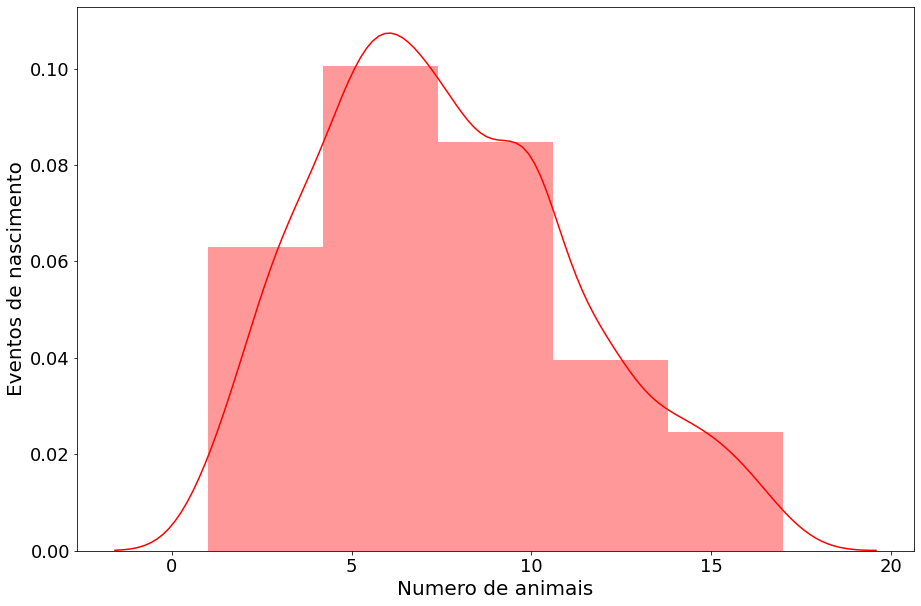

In [31]:
plt.figure(figsize=(15,10))


plot_his = sns.distplot(sem_out['num_ani'], 
                        hist = True, 
                        kde = True, 
                        label='n° de animais', 
                        color = 'red', bins=5)

# Plot formatting
# plt.title('Distribuição dos dados de nascimento - Histograma sem outliers')
plt.xlabel('Numero de animais')
plt.ylabel('Eventos de nascimento')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/histograma_semoutliers_DISSERTACAO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [26]:
# plt.figure(figsize=(10,5))
# plt.title('Soma total de animais por evento de nascimento sem outliers')

# test = sem_out['num_ani'].plot(
# kind = 'hist',
# color='green',
#     bins=150
# )

# plt.xlabel('Número de Animais') #definindo nome do eixo X
# plt.ylabel('Eventos de nascimento') #definindo nome do eixo Y

++++++++++++++++++ Calculando média e mediana a partir das minhas medianas sem outliers +++++++++++++

In [27]:
media_group = sem_out.groupby('ling')                           #Agrupando minha DataFrame por linhagem
mediana_s_out = round(media_group['num_ani'].median(),2)        #Pegando as medianas da coluna 'num_ani', arredondando e guardando numa variável
media_grafico = round(mediana_s_out.mean(),2)                     #Calculando a média das minhas medianas e guardando em outra variável
media_grafico

8.71

In [28]:
mediana_group = sem_out.groupby('ling')                 #agrupando por linhagem e guardando na variável
mediana_grafico = mediana_s_out.median()                #Calculando a mediana da mediana que já foi estabelecida na célula acima (mediana_s_out)
mediana_grafico

10.0

Plotando boxplot depois da retirada dos outliers

R. Plotando novamente o boxplot filtrando a retirada dos outliers, o gráfico ainda apresenta alguns pontos discrepantes, porém, os valores foram retirados a partir de um total de linhagens e no gráfico está sendo representado por cada linhagem. Mas mesmo assim é possível observar que diferente do boxplot anterior nesse os valores possuem um máximo de 16 filhotes por evento de nascimento.

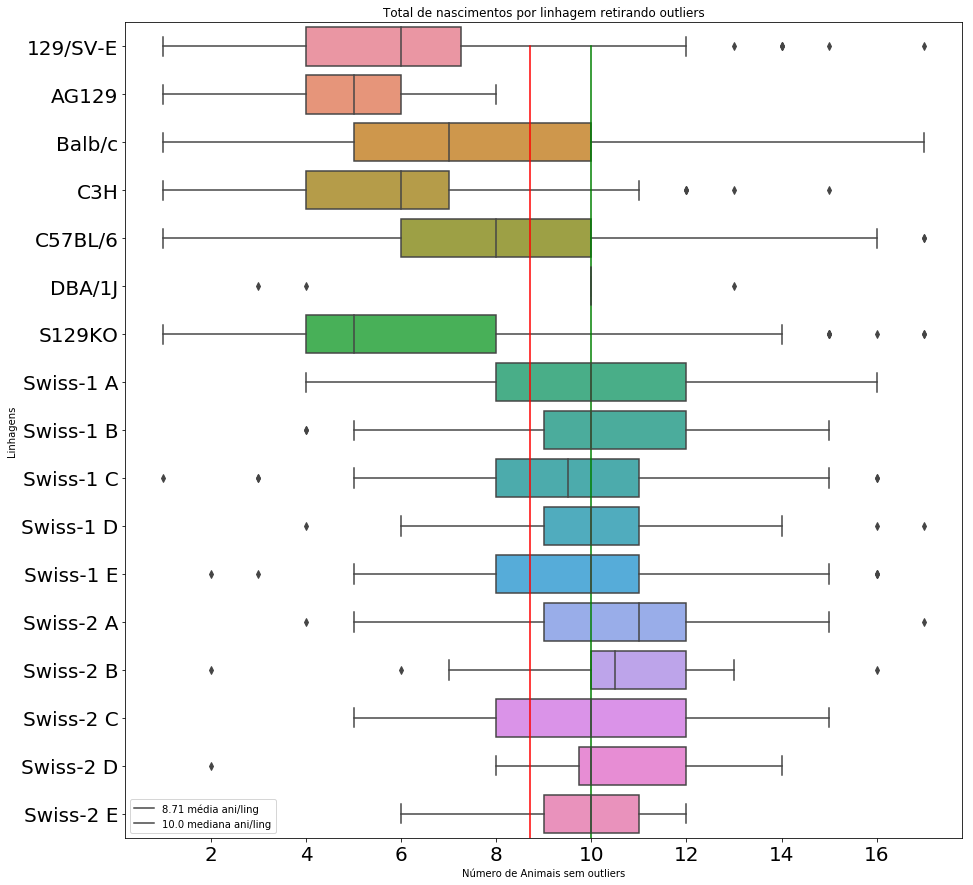

In [29]:
#Bloxplot com a retirada de outliers

# plt.figure(figsize=(15,15))
# plt.title('Total de nascimentos por linhagem retirando outliers')
# sns.boxplot(
    
#     y='ling',
#     x='num_nasc',
# #     hue='ling',
#     data=sem_out.sort_values('ling')
# )
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #plotando faixas de média e mediana


# plt.plot( #função para plotar o gráfico
#     [media_grafico, media_grafico], #faixa que marca a média
#     [len(nume_ani.index), 0], 
#     c='red' #cor vermelha da faixa
# )
# plt.plot( #função para plotar o gráfico
#     [mediana_grafico, mediana_grafico], #faixa que marca a mediana
#     [len(nume_ani.index), 0], 
#     c='green' #cor verde da faixa
# )
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando as legendas 

# plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
# plt.xlabel('Número de Animais sem outliers') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
# plt.savefig(
#     fname="../../resultados/boxplot_semoutliers.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )